# Fundamentos de la Imagen Digital con py5

## Configuración del Entorno

Por favor, ejecuta las siguientes celdas para configurar el entorno de Colab y poder utilizar `py5`.

In [ ]:
!pip install install-jdk --quiet
!python -c "import jdk; print('Java installed to', jdk.install('17'))"
!apt-get -qq install ca-certificates-java libxcursor1 libxrandr2 libxrender1 libxtst6 libxi6 xvfb > /dev/null
!nohup /usr/bin/Xvfb :0 -screen 0 1024x768x24 &
%env DISPLAY=:0
!pip install py5 --quiet

Java installed to /root/.jdk/jdk-17.0.16+8
nohup: appending output to 'nohup.out'
env: DISPLAY=:0


In [ ]:
import py5
import py5_tools

# SECCIÓN 1: Introducción Teórica

### 1.1 ¿Qué es una imagen digital?

Una imagen digital es una representación bidimensional de una escena visual, almacenada en formato numérico. Está compuesta por una matriz de pequeños elementos llamados **píxeles** (del inglés *picture elements*). Cada píxel tiene una posición específica (coordenadas x, y) y un valor de color.

### 1.2 La Ubicuidad de las Imágenes

El Procesamiento Digital de Imágenes (PDI) es una tecnología transversal con aplicaciones en innumerables campos:
- **Medicina:** Resonancias magnéticas (RM), tomografías computarizadas (TC), radiografías.
- **Industria:** Control de calidad automatizado, inspección de productos.
- **Seguridad:** Reconocimiento facial, vigilancia, biometría.
- **Astronomía:** Análisis de imágenes de telescopios, detección de cuerpos celestes.
- **Entretenimiento:** Efectos especiales en cine, videojuegos, fotografía digital.

### 1.3 Conceptos Fundamentales

**Píxel:** La unidad más pequeña de una imagen digital. Contiene información de color.

**Resolución:** El número total de píxeles en una imagen, usualmente expresado como `ancho x alto` (ej. 1920x1080). A mayor resolución, mayor detalle.

**Profundidad de Bits (o Profundidad de Color):** La cantidad de bits utilizados para representar el color de un solo píxel. Una mayor profundidad de bits permite una gama más amplia de colores.
- **1 bit:** Imagen binaria (blanco y negro).
- **8 bits:** 256 niveles (común en escala de grises).
- **24 bits (True Color):** 8 bits por cada canal de color (Rojo, Verde, Azul), permitiendo ~16.7 millones de colores.

---

# SECCIÓN 2: Formación de la Imagen Digital

### 2.1 Muestreo y Cuantificación

La formación de una imagen digital a partir de una escena del mundo real implica dos procesos clave:

**Muestreo (Sampling):** Es el proceso de tomar muestras de una señal continua (la luz que llega al sensor de la cámara) en puntos discretos. En el contexto de una imagen, esto significa dividir la escena en una rejilla de píxeles. La resolución de la imagen está determinada por la densidad de este muestreo.

**Cuantificación (Quantization):** Es el proceso de asignar un valor numérico discreto a cada muestra. Para cada píxel, se mide la intensidad de la luz y se le asigna un valor dentro de un rango limitado. La profundidad de bits determina cuántos niveles de cuantificación están disponibles.

### 2.2 El Modelo Pinhole de la Cámara

El modelo de cámara más simple es el **modelo pinhole** (cámara estenopeica). Imagina una caja oscura con un pequeño agujero (el *pinhole* o estenopo) en una de sus caras. La luz de la escena exterior pasa a través de este agujero y proyecta una imagen invertida en la cara opuesta de la caja (donde estaría el sensor digital). Este modelo es fundamental para entender la geometría de la formación de imágenes y cómo un mundo 3D se proyecta en un plano 2D.

### 2.3 El Sistema Visual Humano (Breve Introducción)

Nuestro sistema visual no percibe la luz de manera lineal. Tenemos dos tipos de fotorreceptores en la retina: **conos** y **bastones**. Los conos son responsables de la visión en color y funcionan mejor con buena iluminación, mientras que los bastones se especializan en la visión con poca luz (visión escotópica) y no distinguen colores. Curiosamente, somos más sensibles a los cambios en el brillo (luminancia) que a los cambios en el color (crominancia), un principio que se aprovecha en muchos algoritmos de compresión de imágenes como JPEG.

---

# SECCIÓN 3: Representación de Imágenes - Espacios de Color

### 3.1 Modelo RGB

El modelo **RGB** (Red, Green, Blue) es un modelo de color aditivo. Esto significa que los colores se crean sumando diferentes intensidades de luz roja, verde y azul. Es el modelo estándar para pantallas digitales (monitores, televisores, teléfonos).

- **(255, 0, 0):** Rojo puro
- **(0, 255, 0):** Verde puro
- **(0, 0, 255):** Azul puro
- **(0, 0, 0):** Negro (ausencia de luz)
- **(255, 255, 255):** Blanco (máxima intensidad de los tres)

El siguiente código muestra los tres canales de color primarios.

In [ ]:
def setup():
    py5.size(600, 200)
    py5.color_mode(py5.RGB, 255)
    py5.no_stroke()

    # Canal Rojo
    py5.fill(255, 0, 0) # Usamos rojo puro para mayor claridad
    py5.rect(0, 0, 200, 200)

    # Canal Verde
    py5.fill(0, 255, 0)
    py5.rect(200, 0, 200, 200)

    # Canal Azul
    py5.fill(0, 0, 255)
    py5.rect(400, 0, 200, 200)

py5.run_sketch()

NameError: name 'py5' is not defined

Para ver el resultado, ejecuta la celda de código de arriba y luego la celda de abajo para tomar una captura de pantalla. Finalmente, ejecuta la última celda para detener el sketch y poder continuar.

/usr/local/lib/python3.12/dist-packages/py5_tools/hooks/frame_hooks.py:121: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return PIL.Image.fromarray(sketch.np_pixels[:, :, 1:], mode="RGB")


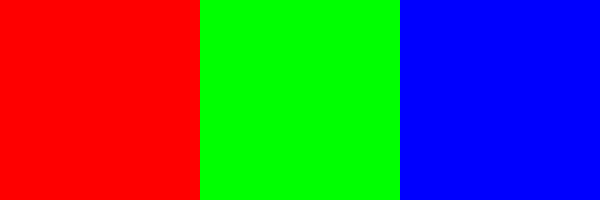

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

### 3.2 Modelo HSV

El modelo **HSV** (Hue, Saturation, Value) representa el color de una manera más intuitiva para los humanos, similar a como un pintor mezclaría colores:

- **Hue (Tono o Matiz):** Es el color puro (ej. rojo, verde, amarillo). Se representa como un ángulo en un círculo de 0 a 360 grados.
- **Saturation (Saturación):** Es la pureza o intensidad del color. Un valor de 0 significa que no hay color (escala de grises), mientras que un valor alto significa un color muy vivo.
- **Value (Valor o Brillo):** Es el brillo del color. Un valor de 0 es siempre negro.

Este modelo es muy útil para tareas como la selección de colores o la detección de objetos basados en su color.

In [ ]:
def setup():
    py5.size(360, 100)
    py5.color_mode(py5.HSB, 360, 100, 100) # En py5, HSB es equivalente a HSV
    py5.no_stroke()
    for i in range(360):
        py5.fill(i, 100, 100) # Matiz varía, saturación y brillo al máximo
        py5.rect(i, 0, 1, py5.height)

py5.run_sketch()

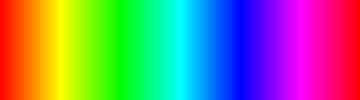

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

---

# SECCIÓN 4: Operaciones Básicas de Píxel

### 4.1 Cargar y Mostrar una Imagen

Antes de manipular los píxeles de una imagen, primero necesitamos cargarla en nuestro sketch. Usaremos la función `py5.load_image()`. Asegúrate de tener una imagen en la carpeta `img/` de tu proyecto. Para este ejemplo, usaremos `img/imagen.jpg`.

In [ ]:
img = None

def setup():
    global img
    py5.size(400, 400)
    # Asegúrate de que la ruta a la imagen sea correcta en tu entorno de Colab.
    # Puede que necesites subir la imagen a la sesión de Colab.
    try:
        img = py5.load_image('/content/Gemini_Generated_Image_ska2z6ska2z6ska2.jpg')
        py5.image(img, 0, 0, py5.width, py5.height)
    except Exception as e:
        print(f'Error al cargar la imagen: {e}')
        py5.background(200)
        py5.fill(0)
        py5.text_align(py5.CENTER, py5.CENTER)
        py5.text('Error: No se pudo cargar la imagen.', py5.width/2, py5.height/2)

py5.run_sketch()

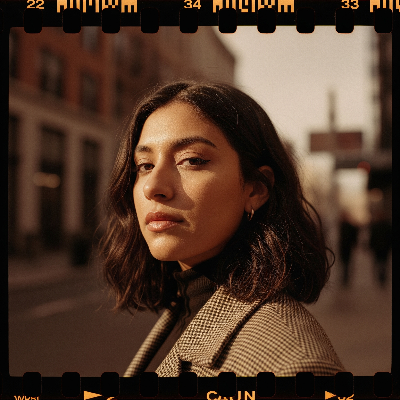

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()

### 4.2 Manipulación Directa de Píxeles

Podemos acceder y modificar cada píxel de una imagen individualmente. Para ello, cargamos la imagen en un array de píxeles con `py5.load_pixels()`. Después de modificarlo, aplicamos los cambios con `py5.update_pixels()`.

El siguiente ejemplo invierte los colores de la imagen.

In [ ]:
img_original = None
img_modificada = None

def setup():
    global img_original, img_modificada
    py5.size(200, 200)
    try:
        img_original = py5.load_image('/content/Gemini_Generated_Image_ska2z6ska2z6ska2.jpg')
        img_modificada = img_original.copy()

        img_modificada.load_pixels()
        for i in range(len(img_modificada.pixels)):
            # Extraer componentes RGB del color del píxel
            r = py5.red(img_modificada.pixels[i])
            g = py5.green(img_modificada.pixels[i])
            b = py5.blue(img_modificada.pixels[i])

            # Invertir cada componente
            r = 255 - r
            g = 255 - g
            b = 255 - b

            # Asignar el nuevo color
            img_modificada.pixels[i] = py5.color(r, g, b)

        img_modificada.update_pixels()
    except Exception as e:
        print(f'Error: {e}')

def draw():
    if img_original and img_modificada:
        py5.image(img_original, 0, 0, 400, 400)
        py5.image(img_modificada, 400, 0, 400, 400)
        py5.fill(255)
        py5.text('Original', 10, 20)
        py5.text('Invertida', 410, 20)
    else:
        py5.background(200)
        py5.fill(0)
        py5.text('Error al cargar la imagen', 10, 20)

py5.run_sketch()

In [ ]:
py5_tools.screenshot()

Output(layout=Layout(max_height='200px', overflow='auto'))

In [ ]:
py5.exit_sketch()

NameError: name 'py5' is not defined

### 4.3 Manipulación de Brillo y Contraste

**Brillo:** Aumentar o disminuir el brillo implica sumar o restar un valor constante a cada componente de color (R, G, B) de cada píxel.

**Contraste:** Ajustar el contraste implica multiplicar cada componente de color por un factor. Un factor > 1 aumenta el contraste, mientras que un factor < 1 lo disminuye.

---

# SECCIÓN 5: Análisis de Imágenes

### 5.1 Histogramas

Un **histograma** de una imagen es un gráfico que representa la distribución de las intensidades de los píxeles. En el eje X se encuentran los niveles de intensidad (de 0 a 255 para una imagen de 8 bits en escala de grises) y en el eje Y se encuentra la cantidad de píxeles que tienen esa intensidad.

El histograma es una herramienta fundamental para el análisis de imágenes porque nos da una idea rápida sobre el **contraste** y el **brillo** de la imagen:

- **Imagen oscura:** El histograma estará concentrado en la zona izquierda (valores bajos).
- **Imagen brillante:** El histograma estará concentrado en la zona derecha (valores altos).
- **Imagen de bajo contraste:** El histograma estará concentrado en una zona estrecha del rango de intensidades.
- **Imagen de alto contraste:** El histograma estará distribuido a lo largo de todo el rango de intensidades.

# SECCIÓN 6: Ejercicios Integrados

### 6.1 Filtro de Canales de Color

Aplica un "tinte" a una imagen para aislar y visualizar sus canales de color Rojo, Verde y Azul por separado. Esto es útil para entender cómo la combinación de estos tres canales forma la imagen final.

In [ ]:
img_color = None

def setup():
    global img_color
    py5.size(800, 200)
    try:
        img_color = py5.load_image('/content/Gemini_Generated_Image_ska2z6ska2z6ska2.jpg')
    except Exception as e:
        print(f'Error: {e}')
        img_color = None

def draw():
    if img_color:
        # Imagen original
        py5.no_tint()
        py5.image(img_color, 0, 0, 200, 200)

        # Tinte Rojo
        py5.tint(255, 0, 0)
        py5.image(img_color, 200, 0, 200, 200)

        # Tinte Verde
        py5.tint(0, 255, 0)
        py5.image(img_color, 400, 0, 200, 200)

        # Tinte Azul
        py5.tint(0, 0, 255)
        py5.image(img_color, 600, 0, 200, 200)
    else:
        py5.background(200)
        py5.fill(0)
        py5.text('Error al cargar la imagen', 10, 20)

py5.run_sketch()

Output(layout=Layout(max_height='200px', overflow='auto'))

/usr/local/lib/python3.12/dist-packages/py5_tools/hooks/frame_hooks.py:105: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return PIL.Image.fromarray(hook.pixels, mode="RGB")


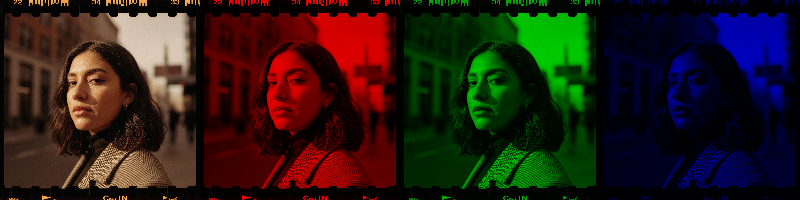

In [ ]:
py5_tools.screenshot()

In [ ]:
py5.exit_sketch()